
## Exercise 2

In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.


Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.


Some notes:

    It should succeed in less than 10 epochs, so it is okay to change epochs= to 10, but nothing larger
    When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
    If you add any additional variables, make sure you use the same names as the ones used in the class 
\
I've started the code for you below -- how would you finish it?


In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

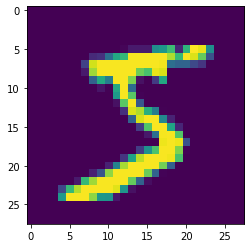

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
print(x_train[0])

In [5]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if(logs.get('acc')>0.991):
            print("Reached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [6]:
x_train = x_train / 255
x_test = x_test / 255

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation = tf.nn.relu), # relu if x<0 then x=0 else x=x
    tf.keras.layers.Dense(256,activation = tf.nn.relu), # relu if x<0 then x=0 else x=x
    tf.keras.layers.Dense(10, activation = tf.nn.softmax) # softmax converts probs to classes 0.1,0.2,0.8 ==> 0,0,1
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics = ['acc'])

# model fitting
model.fit(
    x_train, y_train, epochs = 10, callbacks = [myCallback()]
)



Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3484 - acc: 0.8969
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0872 - acc: 0.9730
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0565 - acc: 0.9818
Epoch 4/10
1875/1875 [==============================] - 2s 999us/step - loss: 0.0374 - acc: 0.9875
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0280 - acc: 0.9902
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0271 - acc: 0.9918
Reached 99% accuracy so cancelling training!


In [7]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 505us/step - loss: 0.0893 - acc: 0.9757


[0.08929271250963211, 0.9757000207901001]

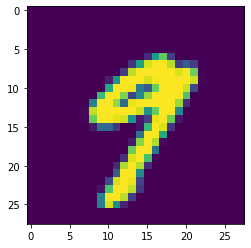

In [8]:
plt.imshow(x_test[20])

In [9]:
model.predict(x_test)[20].argmax()

9

In [10]:
y_test[20]

9